# Scrapyard for `01_wrangle`

### Testing import function
>Raw DataFrame will be stored as `df`

In [1]:
import wrangle_jones

In [2]:
df = wrangle_jones.acquire_zillow()

In [3]:
df

,baths,beds,sqft,fullbaths,latitude,longitude,yearbuilt,tax_value,logerror,transactiondate,unitcnt,propertylandusetypeid
0,3.5,4.0,3100.0,3.0,33634931.0,-117869207.0,1998.0,1023282.0,0.025595,2017-01-01,NaN,261.0
1,1.0,2.0,1465.0,1.0,34449266.0,-119281531.0,1967.0,464000.0,0.055619,2017-01-01,NaN,261.0
2,2.0,3.0,1243.0,2.0,33886168.0,-117823170.0,1962.0,564778.0,0.005383,2017-01-01,NaN,261.0
3,3.0,4.0,2376.0,3.0,34245180.0,-118240722.0,1970.0,145143.0,-0.103410,2017-01-01,1.0,261.0
4,3.0,3.0,1312.0,3.0,34185120.0,-118414640.0,1964.0,119407.0,0.006940,2017-01-01,1.0,266.0
...,...,...,...,...,...,...,...,...,...,...,...,...
77375,3.0,3.0,1741.0,3.0,34202400.0,-118502000.0,1980.0,379000.0,-0.002245,2017-09-20,1.0,266.0
77376,2.0,2.0,1286.0,2.0,34245368.0,-118282383.0,1940.0,354621.0,0.020615,2017-09-20,1.0,261.0
77377,2.0,4.0,1612.0,2.0,34300140.0,-118706327.0,1964.0,67205.0,0.013209,2017-09-21,NaN,261.0
77378,1.0,3.0,1032.0,1.0,34040895.0,-118038169.0,1954.0,49546.0,0.037129,2017-09-21,1.0,261.0


In [4]:
df.dtypes

baths                    float64
beds                     float64
sqft                     float64
fullbaths                float64
latitude                 float64
longitude                float64
yearbuilt                float64
tax_value                float64
logerror                 float64
transactiondate           object
unitcnt                  float64
propertylandusetypeid    float64
dtype: object

In [5]:
# df.rooms.value_counts()

### Testing wrangle function
>Wrangled df will be stored in `df_wrangled`

In [6]:
df.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'yearbuilt', 'tax_value', 'logerror', 'transactiondate', 'unitcnt',
       'propertylandusetypeid'],
      dtype='object')

In [7]:
# df = df[df.propertylandusetypeid.isin([261, 262, 263, 264, 266, 268, 273, 276, 279])]
# df = df[(df.baths > 0) & (df.beds > 0) & (df.sqft > 300)]
# df = df[df.unitcnt == 1]
    
# #dropping null rows and columns with > 50% of values missing
# df = df.dropna(axis = 1, thresh = .5 * len(df))
# df = df.dropna(thresh = .5 * len(df.columns))
# #    df.dropna(axis = 1, inplace = True)
    
#     #label fips counties
# df['fips'] = df.fips.astype(int)
# df['fips_loc'] = df.fips.replace({6037:'Los Angeles, CA', 6059:'Orange, CA', 6111:'Ventura, CA'})
    
#     #create age column from yearbuilt
# df['age'] = 2022 - df.yearbuilt

In [8]:
df.shape

(77380, 12)

In [9]:
# df.dropna().isnull().sum()

In [10]:
df.isna().sum()

baths                        0
beds                         0
sqft                       196
fullbaths                  609
latitude                     0
longitude                    0
yearbuilt                  263
tax_value                    1
logerror                     0
transactiondate              0
unitcnt                  26818
propertylandusetypeid        0
dtype: int64

In [11]:
df_wrangled = wrangle_jones.wrangle_zillow(df)

NumExpr defaulting to 8 threads.


In [12]:
# df_wrangled.rooms.value_counts()

In [13]:
df_wrangled

,baths,beds,sqft,fullbaths,latitude,longitude,tax_value,logerror,age
3,3.0,4,2376,3,34245180,-118240722,145143.0,-0.103410,52.0
4,3.0,3,1312,3,34185120,-118414640,119407.0,0.006940,58.0
7,1.0,2,738,1,34149214,-118239357,218552.0,0.101723,100.0
9,3.0,2,1290,3,33998800,-118416000,371361.0,-0.036763,42.0
10,3.0,4,2540,3,34434971,-118464390,430108.0,0.005963,23.0
...,...,...,...,...,...,...,...,...,...
77374,2.0,4,1633,2,33870815,-118070858,346534.0,0.001082,60.0
77375,3.0,3,1741,3,34202400,-118502000,379000.0,-0.002245,42.0
77376,2.0,2,1286,2,34245368,-118282383,354621.0,0.020615,82.0
77378,1.0,3,1032,1,34040895,-118038169,49546.0,0.037129,68.0


In [14]:
df.yearbuilt.isnull().sum()

263

In [15]:
df_wrangled.shape[0] - df_wrangled.dropna().shape[0]

0

### Our wrangle function took care of all our null values

In [16]:
df_wrangled

,baths,beds,sqft,fullbaths,latitude,longitude,tax_value,logerror,age
3,3.0,4,2376,3,34245180,-118240722,145143.0,-0.103410,52.0
4,3.0,3,1312,3,34185120,-118414640,119407.0,0.006940,58.0
7,1.0,2,738,1,34149214,-118239357,218552.0,0.101723,100.0
9,3.0,2,1290,3,33998800,-118416000,371361.0,-0.036763,42.0
10,3.0,4,2540,3,34434971,-118464390,430108.0,0.005963,23.0
...,...,...,...,...,...,...,...,...,...
77374,2.0,4,1633,2,33870815,-118070858,346534.0,0.001082,60.0
77375,3.0,3,1741,3,34202400,-118502000,379000.0,-0.002245,42.0
77376,2.0,2,1286,2,34245368,-118282383,354621.0,0.020615,82.0
77378,1.0,3,1032,1,34040895,-118038169,49546.0,0.037129,68.0


In [17]:
df.isnull().sum().sort_values(ascending = False)

unitcnt                  26818
fullbaths                  609
yearbuilt                  263
sqft                       196
tax_value                    1
baths                        0
beds                         0
latitude                     0
longitude                    0
logerror                     0
transactiondate              0
propertylandusetypeid        0
dtype: int64

In [18]:
df_wrangled.isnull().sum().sort_values(ascending = False)

baths        0
beds         0
sqft         0
fullbaths    0
latitude     0
longitude    0
tax_value    0
logerror     0
age          0
dtype: int64

In [19]:
# df_wrangled.fips_loc.dtype

In [20]:
# (2022 - df_wrangled.yearbuilt)/2

In [21]:
df_wrangled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33642 entries, 3 to 77379
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   baths      33642 non-null  float64
 1   beds       33642 non-null  int64  
 2   sqft       33642 non-null  int64  
 3   fullbaths  33642 non-null  int64  
 4   latitude   33642 non-null  int64  
 5   longitude  33642 non-null  int64  
 6   tax_value  33642 non-null  float64
 7   logerror   33642 non-null  float64
 8   age        33642 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 2.6 MB


In [22]:
# df_wrangled[['beds', 'sqft']].astype('int')

In [23]:
df_wrangled.dtypes

baths        float64
beds           int64
sqft           int64
fullbaths      int64
latitude       int64
longitude      int64
tax_value    float64
logerror     float64
age          float64
dtype: object

In [24]:
len(df_wrangled.columns)

9

In [25]:
# df_wrangled.fips_loc.dtype

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


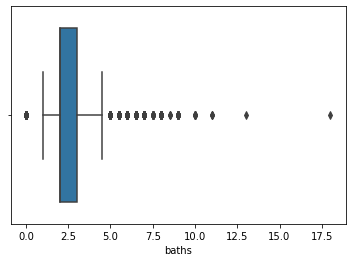

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


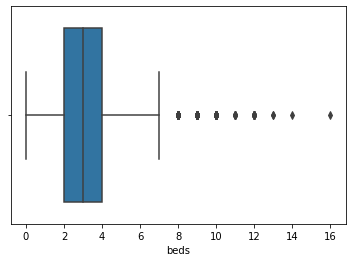

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


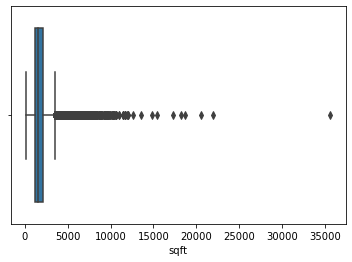

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


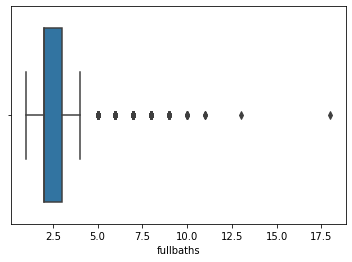

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


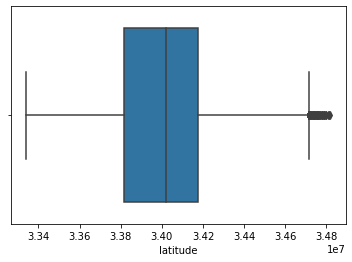

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


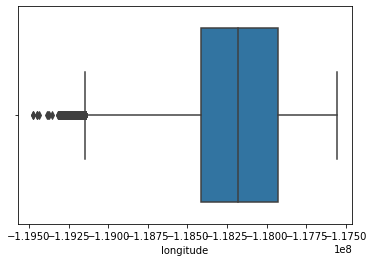

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


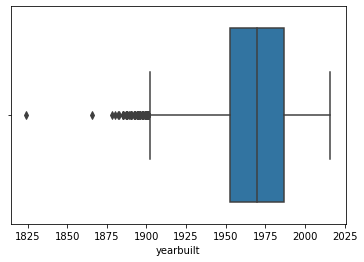

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


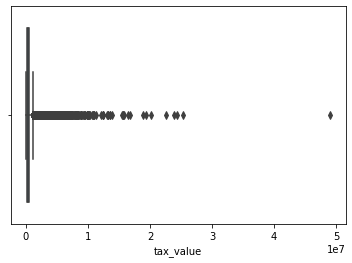

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


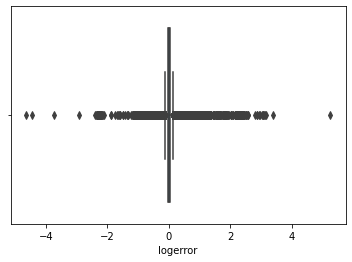

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


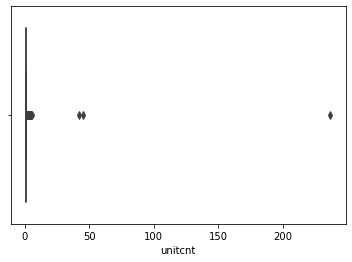

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


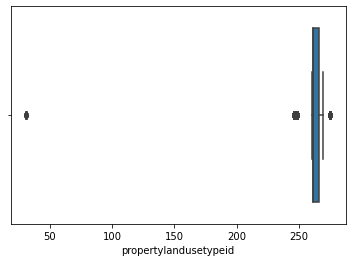

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    if df[col].dtype != 'O':
        sns.boxplot(df[col])
        plt.show();
        print()
    else:
        continue

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


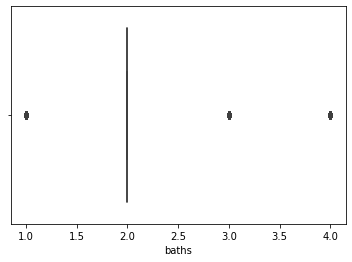

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


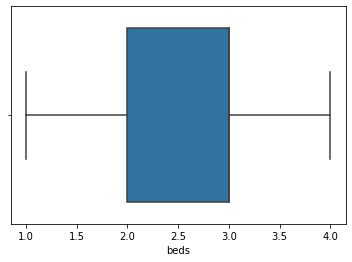

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


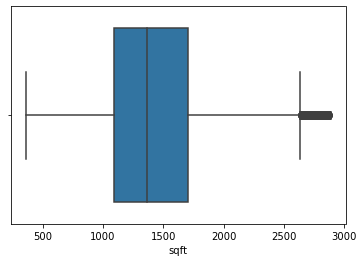

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


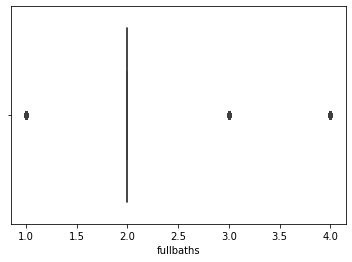

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


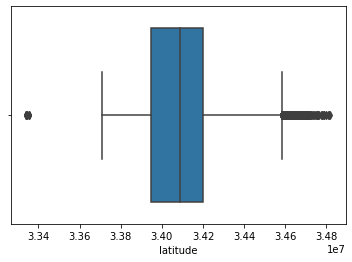

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


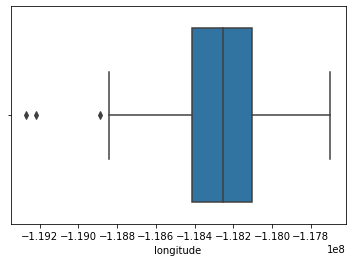

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


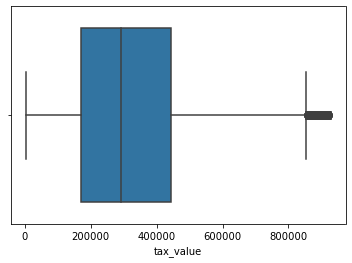

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


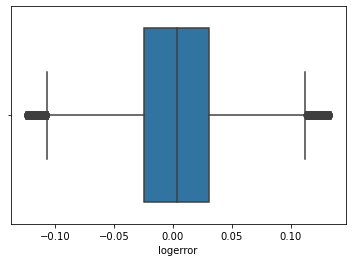

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


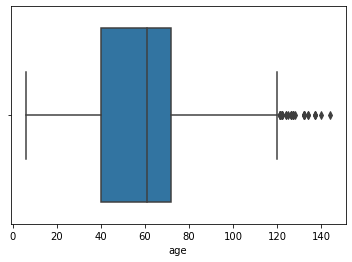

In [27]:
for col in df_wrangled.columns:
    if df_wrangled[col].dtype != 'O':
        sns.boxplot(df_wrangled[col])
        plt.show();
        print()

In [28]:
df_wrangled.dtypes

baths        float64
beds           int64
sqft           int64
fullbaths      int64
latitude       int64
longitude      int64
tax_value    float64
logerror     float64
age          float64
dtype: object

In [29]:
# pd.get_dummies(df_wrangled.fips_loc)

In [30]:
# df_wrangled.fips_loc.value_counts()

In [31]:
# df.fips.value_counts()

In [32]:
train, validate, test = wrangle_jones.split_data(df_wrangled)

print(train.shape, validate.shape, test.shape)

(20184, 9) (6729, 9) (6729, 9)


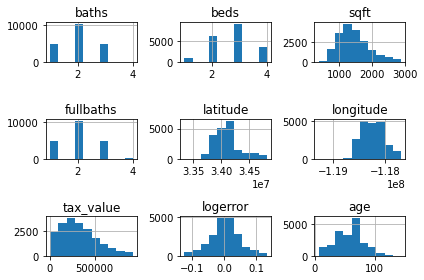

In [33]:
train.hist()
plt.tight_layout();

In [34]:
df_wrangled.columns

Index(['baths', 'beds', 'sqft', 'fullbaths', 'latitude', 'longitude',
       'tax_value', 'logerror', 'age'],
      dtype='object')

In [35]:
# from sklearn.preprocessing import StandardScaler

# cols_to_scale = ['baths', 'beds', 'sqft', 'fullbaths', 'tax_value', 'logerror', 'age']
# scaler = StandardScaler()
# scaler.fit(train[cols_to_scale])

# train[[f'{col}_scaled' for col in cols_to_scale]] = scaler.transform(train[cols_to_scale])
# validate[[f'{col}_scaled' for col in cols_to_scale]] = scaler.transform(validate[cols_to_scale])
# test[[f'{col}_scaled' for col in cols_to_scale]] = scaler.transform(test[cols_to_scale])


In [36]:
# train

In [37]:
train_scaled, validate_scaled, test_scaled = wrangle_jones.scale_data(train, validate, test)

/Users/stephanie/codeup-data-science/zillow-clustering-project/wrangle_jones.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[[f'{col}_scaled' for col in cols_to_scale]] = scaler.transform(test[cols_to_scale])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [42]:
train_scaled

,baths,beds,sqft,fullbaths,latitude,longitude,tax_value,logerror,age,baths_scaled,beds_scaled,sqft_scaled,fullbaths_scaled,tax_value_scaled,logerror_scaled,age_scaled
24277,2.0,2,763,2,33823600,-118342000,327000.0,-0.005293,20.0,-0.024568,-0.939387,-1.419227,-0.024568,0.002470,-0.183790,-1.646064
10231,2.0,4,1171,2,34280592,-118425818,353000.0,-0.011207,66.0,-0.024568,1.530082,-0.564908,-0.024568,0.132355,-0.310836,0.366355
63485,2.0,3,1108,2,34097291,-117999167,39503.0,0.009146,58.0,-0.024568,0.295348,-0.696825,-0.024568,-1.433744,0.126370,0.016369
60254,2.0,3,1398,2,33888595,-118062849,422081.0,-0.036329,50.0,-0.024568,0.295348,-0.089589,-0.024568,0.477454,-0.850465,-0.333617
68284,3.0,2,1055,3,34235900,-118463000,136312.0,-0.036942,36.0,1.352902,-0.939387,-0.807803,1.352902,-0.950127,-0.863638,-0.946093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70959,3.0,3,1846,3,33953761,-118333608,519000.0,-0.042564,17.0,1.352902,0.295348,0.848486,1.352902,0.961621,-0.984408,-1.777309
48908,3.0,2,1127,3,34415800,-118446000,196268.0,-0.036186,38.0,1.352902,-0.939387,-0.657041,1.352902,-0.650612,-0.847391,-0.858596
23095,3.0,3,2523,3,34681158,-118207170,277386.0,0.088203,17.0,1.352902,0.295348,2.266069,1.352902,-0.245381,1.824595,-1.777309
35555,3.0,3,1861,3,34416897,-118515070,397978.0,0.002939,8.0,1.352902,0.295348,0.879895,1.352902,0.357046,-0.006950,-2.171043
